In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/AIML-B2/main/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df = df.drop('Unnamed: 32',axis = 1)
df.drop('id',axis = 1, inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
l = list(df.columns)
features_mean = [item for item in l if item.endswith('mean')]
features_se = [item for item in l if item.endswith('se')]
features_worst = [item for item in l if item.endswith('worst')]
features_se
df['diagnosis'].unique()
df['diagnosis'].value_counts()
df.shape

(569, 31)

In [6]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

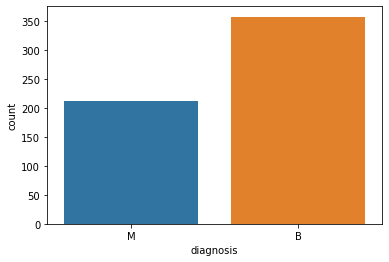

In [7]:
sns.countplot(df['diagnosis'], label="Count",);

In [8]:
corr = df.corr()
corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


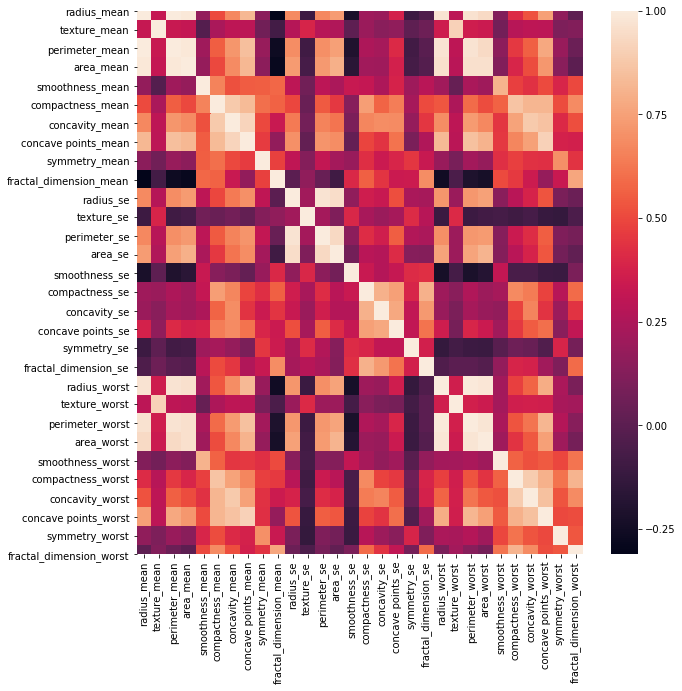

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(corr);

In [18]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.head(1)
X_test.head()
y_test.head()

250    M
406    B
243    B
552    B
329    M
Name: diagnosis, dtype: object

In [20]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
print(X_test)

[[ 1.94427064  1.06918094  1.93375044 ...  1.41474328  0.34885848
  -0.30832917]
 [ 0.5720608  -1.0058036   0.50351223 ... -0.04286969 -0.18974697
  -0.77470584]
 [-0.11118534  1.11926677 -0.14794887 ... -0.81707723 -0.3677344
  -1.15973125]
 ...
 [-0.73439731 -0.00885701 -0.74071234 ... -0.73374239  0.20801625
  -0.06594704]
 [ 1.3382113   0.68995963  1.3054377  ...  0.82184128  0.16468018
  -0.04923103]
 [ 1.7641681   1.90394484  1.68573225 ...  0.80541327  0.3875514
  -0.22474913]]


In [23]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M'], dtype=object)

In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9824561403508771


In [25]:
lr_acc = accuracy_score(y_test, y_pred)
print(lr_acc)

0.9824561403508771


In [26]:
results = pd.DataFrame()
tempResults = pd.DataFrame({'Algorithm':['Logistic Regression Method'], 'Accuracy':[lr_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456


In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
y_pred

array(['M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B',
       'M', 'M'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.935672514619883


In [29]:
dtc_acc = accuracy_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Decision tree Classifier Method'], 'Accuracy':[dtc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.935673


In [30]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_pred

array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M'], dtype=object)

In [31]:
from sklearn.metrics import accuracy_score
rfc_acc = accuracy_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Random Forest Classifier Method'], 'Accuracy':[rfc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.935673
0,Random Forest Classifier Method,0.970760


In [32]:
from sklearn import svm
svc = svm.SVC()
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred


array(['M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M'], dtype=object)

In [33]:
svc_acc = accuracy_score(y_test, y_pred)
tempResults = pd.DataFrame({'Algorithm':['Support Vector Classifier Method'], 'Accuracy':[svc_acc]})
results = pd.concat( [results, tempResults] )
results = results[['Algorithm','Accuracy']]
results

,Algorithm,Accuracy
0,Logistic Regression Method,0.982456
0,Decision tree Classifier Method,0.935673
0,Random Forest Classifier Method,0.970760
0,Support Vector Classifier Method,0.982456
